In [3]:
#Section Rough
#Everything in here is some basic processing and experimentation untill Section EDA.  
import pandas as pd
import numpy as np
data_raw = pd.read_csv('2009_2020-annual-surgical_wait_times.csv')
data_raw.head(100)


,FISCAL_YEAR,HEALTH_AUTHORITY,HOSPITAL_NAME,PROCEDURE_GROUP,WAITING,COMPLETED,COMPLETED_50TH_PERCENTILE,COMPLETED_90TH_PERCENTILE
0,2009/10,All Health Authorities,All Facilities,Abdominoplasty,52,100,9.1,42.6
1,2009/10,All Health Authorities,All Facilities,All Other Procedures,"1,347","6,287",4.0,17.1
2,2009/10,All Health Authorities,All Facilities,All Procedures,"72,056","219,284",5.3,24.3
3,2009/10,All Health Authorities,All Facilities,Aortic Aneurysm Repair,96,365,3.7,13.5
4,2009/10,All Health Authorities,All Facilities,Appendectomy,19,88,3.7,9.1
...,...,...,...,...,...,...,...,...
95,2009/10,Fraser,Abbotsford Regional Hospital And Cancer Centre,Breast Reduction,252,175,32.0,76.8
96,2009/10,Fraser,Abbotsford Regional Hospital And Cancer Centre,Cholecystectomy,74,237,8.0,20.6
97,2009/10,Fraser,Abbotsford Regional Hospital And Cancer Centre,Colostomy/Ileostomy,<5,9,4.6,19.8
98,2009/10,Fraser,Abbotsford Regional Hospital And Cancer Centre,Cone Biopsy,0,<5,NaN,NaN


In [4]:
data_raw.shape

(37665, 8)

In [5]:
data_raw.loc[0:, "WAITING":"COMPLETED"]

,WAITING,COMPLETED
0,52,100
1,"1,347","6,287"
2,"72,056","219,284"
3,96,365
4,19,88
...,...,...
37660,<5,0
37661,10,77
37662,<5,22
37663,0,<5


In [8]:
data_raw.describe(include = 'all')

,FISCAL_YEAR,HEALTH_AUTHORITY,HOSPITAL_NAME,PROCEDURE_GROUP,WAITING,COMPLETED,COMPLETED_50TH_PERCENTILE,COMPLETED_90TH_PERCENTILE
count,37665,37665,37665,37665,37665,37665,30266.000000,30266.000000
unique,11,7,63,85,1525,2489,NaN,NaN
top,2011/12,Fraser,All Facilities,All Procedures,<5,<5,NaN,NaN
freq,3469,8444,6168,726,9649,6607,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.421086,22.002425
std,NaN,NaN,NaN,NaN,NaN,NaN,7.163949,17.150503
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.100000,10.300000
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.300000,18.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,29.500000


In [19]:
data = data_raw.rename(columns={'FISCAL_YEAR':'year', 'HEALTH_AUTHORITY': 'HA', 'HOSPITAL_NAME':'HospName', 'PROCEDURE_GROUP': 'ProcdGrp', 'WAITING':'Waiting', 'COMPLETED': 'Completed', 'COMPLETED_50TH_PERCENTILE': 'wait_median', 'COMPLETED_90TH_PERCENTILE':'wait_90'})

In [20]:
data[data['HospName'] == 'Kelowna General Hospital']

,year,HA,HospName,ProcdGrp,Waiting,Completed,wait_median,wait_90
1087,2009/10,Interior,Kelowna General Hospital,Abdominoplasty,0,<5,NaN,NaN
1088,2009/10,Interior,Kelowna General Hospital,All Other Procedures,61,290,4.0,11.7
1089,2009/10,Interior,Kelowna General Hospital,All Procedures,"4,053","10,397",6.0,26.3
1090,2009/10,Interior,Kelowna General Hospital,Aortic Aneurysm Repair,<5,42,2.9,12.7
1091,2009/10,Interior,Kelowna General Hospital,Appendectomy,<5,<5,NaN,NaN
...,...,...,...,...,...,...,...,...
35437,2019/20,Interior,Kelowna General Hospital,Vaginal Repair,21,68,9.7,38.2
35438,2019/20,Interior,Kelowna General Hospital,Varicose Veins Ligation/Stripping,35,45,32.0,60.7
35439,2019/20,Interior,Kelowna General Hospital,Vascular Bypass Graft - Non Cardiac,<5,80,1.0,5.9
35440,2019/20,Interior,Kelowna General Hospital,Vascular Surgery - Other,28,200,2.1,8.9


In [34]:
#Renaming of columns and removal of NA values
wdata =  (
        pd.read_csv('2009_2020-annual-surgical_wait_times.csv')
        .rename(columns={'FISCAL_YEAR':'year', 'HEALTH_AUTHORITY': 'h_a', 'HOSPITAL_NAME':'hosp', 'PROCEDURE_GROUP': 'prcd', 'WAITING':'waiting', 'COMPLETED': 'comp', 'COMPLETED_50TH_PERCENTILE': 'wait_med', 'COMPLETED_90TH_PERCENTILE':'wait_90'})
        .dropna()
)
wdata.head(100)

,year,h_a,hosp,prcd,waiting,comp,wait_med,wait_90
0,2009/10,All Health Authorities,All Facilities,Abdominoplasty,52,100,9.1,42.6
1,2009/10,All Health Authorities,All Facilities,All Other Procedures,"1,347","6,287",4.0,17.1
2,2009/10,All Health Authorities,All Facilities,All Procedures,"72,056","219,284",5.3,24.3
3,2009/10,All Health Authorities,All Facilities,Aortic Aneurysm Repair,96,365,3.7,13.5
4,2009/10,All Health Authorities,All Facilities,Appendectomy,19,88,3.7,9.1
...,...,...,...,...,...,...,...,...
99,2009/10,Fraser,Abbotsford Regional Hospital And Cancer Centre,Cyst/Ganglion Removal,<5,6,5.4,13.4
100,2009/10,Fraser,Abbotsford Regional Hospital And Cancer Centre,D&C and Related Surgery,51,169,7.1,25.8
101,2009/10,Fraser,Abbotsford Regional Hospital And Cancer Centre,Dental Surgery,41,274,4.1,13.0
102,2009/10,Fraser,Abbotsford Regional Hospital And Cancer Centre,Endarterectomy,12,80,4.5,11.1


In [23]:
wdata.shape

(30266, 8)

In [24]:
wdata['waiting'] = (
                  wdata['waiting'].str.replace(',','')
                                .str.replace('<5','3')
)

wdata['comp'] = (
               wdata['comp'].str.replace(',','')
                          .str.replace('<5','3')
)

wdata['waiting'] = pd.to_numeric(wdata['waiting'])
wdata['comp'] = pd.to_numeric(wdata['comp'])
wdata.head()


,year,h_a,hosp,prcd,waiting,comp,wait_med,wait_90
0,2009/10,All Health Authorities,All Facilities,Abdominoplasty,52,100,9.1,42.6
1,2009/10,All Health Authorities,All Facilities,All Other Procedures,1347,6287,4.0,17.1
2,2009/10,All Health Authorities,All Facilities,All Procedures,72056,219284,5.3,24.3
3,2009/10,All Health Authorities,All Facilities,Aortic Aneurysm Repair,96,365,3.7,13.5
4,2009/10,All Health Authorities,All Facilities,Appendectomy,19,88,3.7,9.1


In [25]:
#To demonstrate that the waiting and comp values are now numeric
wdata.describe()

,waiting,comp,wait_med,wait_90
count,30266.000000,30266.000000,30266.000000,30266.000000
mean,174.441816,506.071004,7.421086,22.002425
std,1779.251684,5107.433067,7.163949,17.150503
min,0.000000,5.000000,0.000000,0.000000
25%,3.000000,17.000000,3.100000,10.300000
50%,13.000000,52.000000,5.300000,18.000000
75%,54.000000,171.000000,9.000000,29.500000
max,93941.000000,248901.000000,142.600000,256.100000


In [33]:
#A measure of waiting times per year across all health authorites for all procedures
wd = wdata[(wdata['prcd'] == 'All Procedures') & (wdata['hosp'] == 'All Facilities') & (wd['h_a'] == 'All Health Authorities')]
wd
# There is an increasing trend especially since 2014

,year,h_a,hosp,prcd,waiting,comp,wait_med,wait_90
2,2009/10,All Health Authorities,All Facilities,All Procedures,72056,219284,5.3,24.3
3356,2010/11,All Health Authorities,All Facilities,All Procedures,75716,225674,5.7,25.9
6793,2011/12,All Health Authorities,All Facilities,All Procedures,75698,232922,5.7,26.1
10262,2012/13,All Health Authorities,All Facilities,All Procedures,73367,228053,5.3,25.9
13727,2013/14,All Health Authorities,All Facilities,All Procedures,75560,225798,5.6,27.0
17176,2014/15,All Health Authorities,All Facilities,All Procedures,76770,226409,6.3,30.6
20587,2015/16,All Health Authorities,All Facilities,All Procedures,79353,229281,6.9,32.0
23993,2016/17,All Health Authorities,All Facilities,All Procedures,85404,233422,7.1,32.3
27431,2017/18,All Health Authorities,All Facilities,All Procedures,86566,236943,7.1,33.0
30880,2018/19,All Health Authorities,All Facilities,All Procedures,87061,248901,7.1,31.7


In [12]:
#Section EDA



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_theme(style = "darkgrid", font_scale = 1.5)

from Scripts import project_functions
df = project_functions.load_and_process('2009_2020-annual-surgical_wait_times.csv')
df

,year,h_a,hosp,prcd,waiting,comp,wait_med,wait_90,wait_median_d,wait_90_d
0,2009/10,All Health Authorities,All Facilities,Abdominoplasty,52,100,9.1,42.6,63.7,298.2
1,2009/10,All Health Authorities,All Facilities,All Other Procedures,1347,6287,4.0,17.1,28.0,119.7
2,2009/10,All Health Authorities,All Facilities,All Procedures,72056,219284,5.3,24.3,37.1,170.1
3,2009/10,All Health Authorities,All Facilities,Aortic Aneurysm Repair,96,365,3.7,13.5,25.9,94.5
4,2009/10,All Health Authorities,All Facilities,Appendectomy,19,88,3.7,9.1,25.9,63.7
...,...,...,...,...,...,...,...,...,...,...
37657,2019/20,Vancouver Island,West Coast General Hospital,Rectal Surgery,5,13,4.1,13.9,28.7,97.3
37659,2019/20,Vancouver Island,West Coast General Hospital,Skin Tumour Removal,3,8,1.1,5.2,7.7,36.4
37661,2019/20,Vancouver Island,West Coast General Hospital,Uterine Surgery,10,77,4.1,9.8,28.7,68.6
37662,2019/20,Vancouver Island,West Coast General Hospital,Vaginal Repair,3,22,4.3,12.0,30.1,84.0


In [71]:
df.describe()

,waiting,comp,wait_med,wait_90,wait_median_d,wait_90_d
count,30266.000000,30266.000000,30266.000000,30266.000000,30266.000000,30266.000000
mean,174.441816,506.071004,7.421086,22.002425,51.947605,154.016976
std,1779.251684,5107.433067,7.163949,17.150503,50.147641,120.053523
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,17.000000,3.100000,10.300000,21.700000,72.100000
50%,13.000000,52.000000,5.300000,18.000000,37.100000,126.000000
75%,54.000000,171.000000,9.000000,29.500000,63.000000,206.500000
max,93941.000000,248901.000000,142.600000,256.100000,998.200000,1792.700000


In [72]:
df.describe(include= np.object).T

,count,unique,top,freq
year,30266,11,2011/12,2799
h_a,30266,7,Fraser,7151
hosp,30266,63,All Facilities,5847
prcd,30266,84,All Procedures,719


In [89]:
wd = df[~(df['h_a'] == 'All Health Authorities')] 
wd = wd[~(wd['hosp'] == 'All Facilities')] 
wd = wd[~(wd['prcd'] == 'All Procedures')]
bd = wd

In [90]:
bd.describe(include= np.object).T

,count,unique,top,freq
year,23777,11,2011/12,2199
h_a,23777,6,Fraser,6140
hosp,23777,62,Kelowna General Hospital,836
prcd,23777,83,Hernia Repair - Abdominal,555


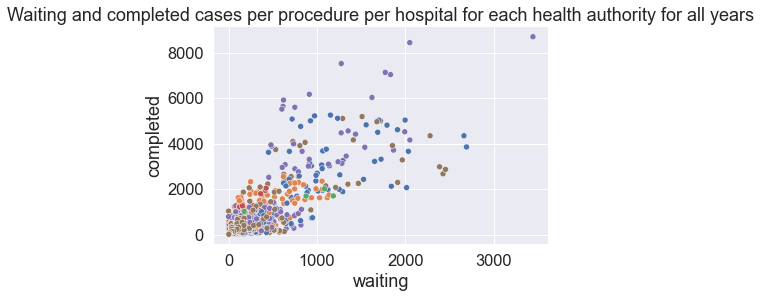

In [150]:
plot1 = sns.scatterplot(data=bd, y = 'comp', x = 'waiting', hue = 'h_a', legend = False)
plot1.set_title('Waiting and completed cases per procedure per hospital for each health authority for all years')
plot1.set_ylabel('completed')
plot1.spines['right'].set_visible(False)
plot1.spines['top'].set_visible(False)

In [92]:
#Scatterplot shows an almost linear relation when the waiting and completed cases are paired for health authority. 
#With an increase in completed cases is also in increase in waiting cases. 

In [93]:
wd_all_prcd = df[(df['prcd'] == 'All Procedures')]
wd_all_prcd = wd_all_prcd[~(wd_all_prcd['hosp'] == 'All Facilities')] 
wd_all_prcd.head(20)

,year,h_a,hosp,prcd,waiting,comp,wait_med,wait_90,wait_median_d,wait_90_d
87,2009/10,Fraser,Abbotsford Regional Hospital And Cancer Centre,All Procedures,2376,5041,7.3,30.3,51.1,212.1
241,2009/10,Fraser,Burnaby Hospital,All Procedures,2881,7173,6.4,33.0,44.8,231.0
310,2009/10,Fraser,Chilliwack General Hospital,All Procedures,2473,7830,10.0,28.0,70.0,196.0
372,2009/10,Fraser,Delta Hospital,All Procedures,981,4431,2.7,17.0,18.9,119.0
428,2009/10,Fraser,Eagle Ridge Hospital,All Procedures,2671,5328,6.7,24.4,46.9,170.8
496,2009/10,Fraser,Langley Memorial Hospital,All Procedures,1510,6234,6.0,28.3,42.0,198.1
555,2009/10,Fraser,Mission Memorial Hospital,All Procedures,0,405,6.0,36.1,42.0,252.7
590,2009/10,Fraser,Peace Arch Hospital,All Procedures,1846,3101,8.7,41.1,60.9,287.7
650,2009/10,Fraser,Ridge Meadows Hospital,All Procedures,2194,6487,6.9,31.6,48.3,221.2
706,2009/10,Fraser,Royal Columbian Hospital,All Procedures,1135,3976,2.1,13.5,14.7,94.5


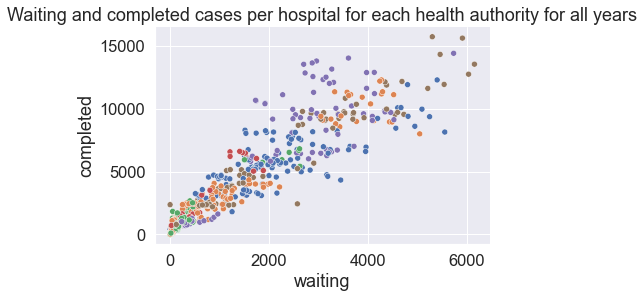

In [149]:
plot2 = sns.scatterplot(data=wd_all_prcd, y = 'comp', x = 'waiting', hue = 'h_a', legend = False)
plot2.set_title('Waiting and completed cases per hospital for each health authority for all years')
plot2.set_ylabel('completed')
plot2.spines['right'].set_visible(False)
plot2.spines['top'].set_visible(False)

In [95]:
#This is a generalization of the above scatterplot. 
#Instead of using the waiting and completed cases for each specific procedure, 
#we're taking all procedures from each hospital over each year and comparing the waiting and completed cases
# A better linear correlation is observed with this secodn scatterplot. 

In [103]:
wd_all = df[(df['h_a'] == 'All Health Authorities') & (df['prcd'] == 'All Procedures') ]
wd_all

,year,h_a,hosp,prcd,waiting,comp,wait_med,wait_90,wait_median_d,wait_90_d
2,2009/10,All Health Authorities,All Facilities,All Procedures,72056,219284,5.3,24.3,37.1,170.1
3356,2010/11,All Health Authorities,All Facilities,All Procedures,75716,225674,5.7,25.9,39.9,181.3
6793,2011/12,All Health Authorities,All Facilities,All Procedures,75698,232922,5.7,26.1,39.9,182.7
10262,2012/13,All Health Authorities,All Facilities,All Procedures,73367,228053,5.3,25.9,37.1,181.3
13727,2013/14,All Health Authorities,All Facilities,All Procedures,75560,225798,5.6,27.0,39.2,189.0
17176,2014/15,All Health Authorities,All Facilities,All Procedures,76770,226409,6.3,30.6,44.1,214.2
20587,2015/16,All Health Authorities,All Facilities,All Procedures,79353,229281,6.9,32.0,48.3,224.0
23993,2016/17,All Health Authorities,All Facilities,All Procedures,85404,233422,7.1,32.3,49.7,226.1
27431,2017/18,All Health Authorities,All Facilities,All Procedures,86566,236943,7.1,33.0,49.7,231.0
30880,2018/19,All Health Authorities,All Facilities,All Procedures,87061,248901,7.1,31.7,49.7,221.9


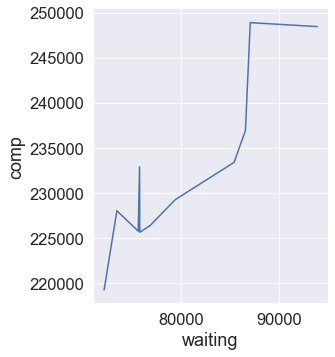

In [152]:
plot3 = sns.relplot(x="waiting", y="comp", kind="line", data=wd_all)

In [ ]:
#Here we can see the correlation using a line. It looks like an increasing trend between cases waiting and completed
#In the beggining we see an interesting spike for completed cases while waiting cases remained the same.
#Towards the end, the completed cases stayed the same (the highest they have been).
#While the number of waiting cases increase. 